In [19]:

from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Activation
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
# =============================================================================
# 
# =============================================================================


np.random.seed(0)
N_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
N_CLASS = 10
OPTIMIZER = Adam()
N_HIDDEN_1 = 128
N_HIDDEN_2 = 512
N_HIDDEN_3 = 256
N_HIDDEN_4 = 128
N_HIDDEN_5 = 1024
VALIDATION_SPLIT = 0.2
DROPOUT = 0.3


(X_train, y_train), (X_test, y_test) = mnist.load_data()

# =============================================================================
# 
# =============================================================================

RESHAPE = 784


N_TRAIN_DATA = X_train.shape[0]
N_TEST_DATA = X_test.shape[0]

X_train = X_train.reshape(N_TRAIN_DATA, RESHAPE)
X_test = X_test.reshape(N_TEST_DATA, RESHAPE)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train /= 225
X_test /= 225

y_train = np_utils.to_categorical(y_train, N_CLASS)
y_test = np_utils.to_categorical(y_test, N_CLASS)

# =============================================================================
# 
# =============================================================================
model = Sequential()

model.add(Dense(units = N_HIDDEN_1, 
                activation='relu', 
                kernel_initializer='glorot_uniform', 
                input_dim=RESHAPE))

model.add(Dense(units = N_HIDDEN_2, 
                activation='relu', 
                kernel_initializer='glorot_uniform',
                ))

model.add(Dropout(DROPOUT))

model.add(Dense(units = N_HIDDEN_3, 
                activation='relu', 
                kernel_initializer='glorot_uniform', 
                ))

model.add(Dropout(DROPOUT))

model.add(Dense(units = N_HIDDEN_4, 
                activation='relu', 
                kernel_initializer='glorot_uniform', 
                ))

model.add(Dropout(DROPOUT))

model.add(Dense(units = N_HIDDEN_5, 
                activation='relu', 
                kernel_initializer='glorot_uniform', 
                ))

model.add(Dropout(DROPOUT))

model.add(Dense(units = N_CLASS, 
                activation='softmax', 
                kernel_initializer='glorot_uniform', 
                ))

model.summary()

model.compile(loss = 'categorical_crossentropy', 
              optimizer=OPTIMIZER,
              metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_24 (Dense)             (None, 512)               66048     
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

In [20]:
history = model.fit(X_train, y_train, batch_size = BATCH_SIZE, 
                    epochs = N_EPOCH, verbose = VERBOSE, 
                    validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 4s 80us/step - loss: 0.4230 - acc: 0.8656 - val_loss: 0.1595 - val_acc: 0.9520
Epoch 2/50
48000/48000 [==============================] - 3s 69us/step - loss: 0.1600 - acc: 0.9556 - val_loss: 0.1249 - val_acc: 0.9631
Epoch 3/50
48000/48000 [==============================] - 3s 69us/step - loss: 0.1165 - acc: 0.9674 - val_loss: 0.1102 - val_acc: 0.9702
Epoch 4/50
48000/48000 [==============================] - 3s 69us/step - loss: 0.0913 - acc: 0.9745 - val_loss: 0.1198 - val_acc: 0.9675
Epoch 5/50
48000/48000 [==============================] - 3s 70us/step - loss: 0.0765 - acc: 0.9789 - val_loss: 0.1142 - val_acc: 0.9687
Epoch 6/50
48000/48000 [==============================] - 3s 70us/step - loss: 0.0668 - acc: 0.9810 - val_loss: 0.1016 - val_acc: 0.9709
Epoch 7/50
48000/48000 [==============================] - 3s 72us/step - loss: 0.0588 - acc: 0.9832 - val_loss: 0.1109 - val_acc

In [0]:
TITLE = 'MNIST_5.h5'
model.save(TITLE)
classifier_file = drive.CreateFile({'title' : TITLE})    
classifier_file.SetContentFile(TITLE)    
classifier_file.Upload()


In [0]:
from keras.models import load_model
model = load_model('MNIST_3.h5')

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


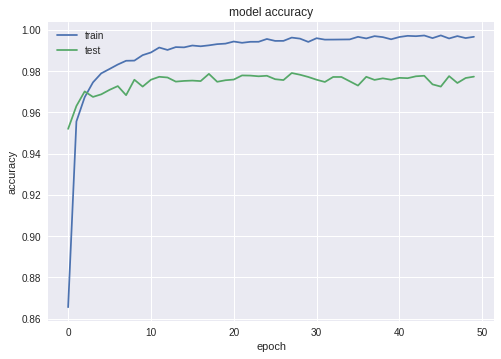

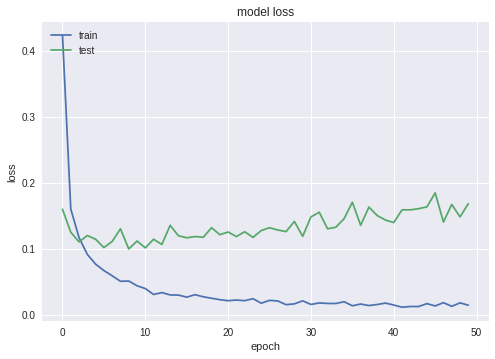

In [22]:
import matplotlib.pyplot as plt

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






In [23]:
scores = model.evaluate(X_test, y_test, verbose=1)
print("Test Score: ", scores[0])
print("Accuracy: " , scores[1])

10000/10000 [==============================] - 1s 56us/step
Test Score:  0.1371793817155042
Accuracy:  0.9802


In [24]:

# Predicting the Test set results
y_pred = model.predict(X_test)

y_test_argmax = y_test.argmax(axis=1)
y_pred_argmax = y_pred.argmax(axis=1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

cm

array([[ 973,    0,    1,    0,    1,    0,    1,    1,    2,    1],
       [   0, 1123,    5,    0,    0,    0,    3,    0,    3,    1],
       [   1,    1, 1018,    1,    1,    0,    1,    5,    4,    0],
       [   0,    0,    6,  985,    0,    4,    0,    5,    8,    2],
       [   0,    1,    1,    1,  967,    0,    5,    1,    0,    6],
       [   2,    0,    0,    9,    3,  866,    4,    2,    6,    0],
       [   7,    1,    0,    1,    7,    3,  938,    0,    1,    0],
       [   3,    4,   10,    0,    1,    0,    0, 1002,    3,    5],
       [   2,    0,    6,    2,    3,    3,    2,    2,  951,    3],
       [   1,    2,    1,    3,   12,    4,    0,    6,    1,  979]])

In [0]:

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

In [0]:
class_names = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_argmax, y_pred_argmax, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test_argmax, y_pred_argmax, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


In [6]:
!pip install -U -q PyDrive

    100% |████████████████████████████████| 993kB 21.1MB/s 


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()                       
drive = GoogleDrive(gauth)

In [0]:
model.save('MNIST_3.h5')
classifier_file = drive.CreateFile({'title' : 'MNIST_3.h5'})    
classifier_file.SetContentFile('MNIST_3.h5')    
classifier_file.Upload()